# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv


Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

Here some explanation for diabetes dataset:
Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
diabetes = pd.read_csv('diabetes_data.csv')
hypertension = pd.read_csv('hypertension_data.csv')
stroke = pd.read_csv('stroke_data.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
print(diabetes.info())
diabetes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [21]:
# Trying to see count of diabetes presence and absence. 
diabetes.Diabetes.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [3]:
# Checking for any missing data
missing_db = diabetes.isna().mean() * 100
missing_db

Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Stroke                  0.0
HighBP                  0.0
Diabetes                0.0
dtype: float64

In [4]:
print(hypertension.info())
hypertension.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# Checking for any missing data
missing_HTN = hypertension.isna().mean() * 100
missing_HTN

age         0.000000
sex         0.095848
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

In [6]:
print(stroke.info())
stroke.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB
None


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [7]:
# Trying to see which age has the most stroke occurance
stroke.age.value_counts()

 53.0     668
 49.0     660
 60.0     657
 50.0     657
 56.0     655
         ... 
 101.0      6
-5.0        6
-6.0        2
-9.0        1
 103.0      1
Name: age, Length: 111, dtype: int64

In [20]:
# Was trying to see youngest age but found that there are negative values 
age_group = stroke.sort_values(by='age', ascending=True)
age_group.head(30)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11939,1.0,-9.0,1,0,1,3,1,124.13,31.4,0,1
15049,0.0,-6.0,1,0,1,3,1,124.13,31.4,0,1
11713,1.0,-6.0,0,1,1,2,0,120.46,36.8,1,1
11716,1.0,-5.0,0,0,0,4,1,89.22,37.8,0,1
9708,1.0,-5.0,1,0,1,4,0,179.12,28.1,1,1
14958,1.0,-5.0,1,0,1,3,1,194.99,32.8,0,1
11820,1.0,-5.0,0,0,0,4,1,94.39,22.8,0,1
9277,1.0,-5.0,0,0,1,4,0,97.92,26.9,1,1
15146,1.0,-5.0,1,0,1,2,1,213.03,20.2,1,1
10458,1.0,-4.0,0,0,1,4,1,78.18,30.8,0,1


In [9]:
# Checking to see if smoking correlates to stroke occurence, but looks like it doesn't make a difference
stroke.smoking_status.value_counts()

0    20921
1    19989
Name: smoking_status, dtype: int64

In [18]:
# Checking to see if people with stroke has higher average blood glucose levels
glucose_stroke = stroke.avg_glucose_level.value_counts()
glucose_stroke.sort_values(ascending=False)

76.57     144
231.56    142
104.12    142
80.13     140
250.89    136
         ... 
88.88       4
196.81      4
59.43       4
125.26      4
61.88       4
Name: avg_glucose_level, Length: 2903, dtype: int64

In [8]:
# Checking for any missing data
missing_STR = stroke.isna().mean() * 100
missing_STR

sex                  0.007333
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [27]:
# Preparing the dataframe for visualization
new_diabetes = diabetes[diabetes['Stroke'] == 1]
age_groups = new_diabetes.Age.value_counts()
age_groups

10.0    783
11.0    691
9.0     674
13.0    634
12.0    552
8.0     493
7.0     303
6.0     124
5.0      67
4.0      44
3.0      19
2.0       7
1.0       4
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

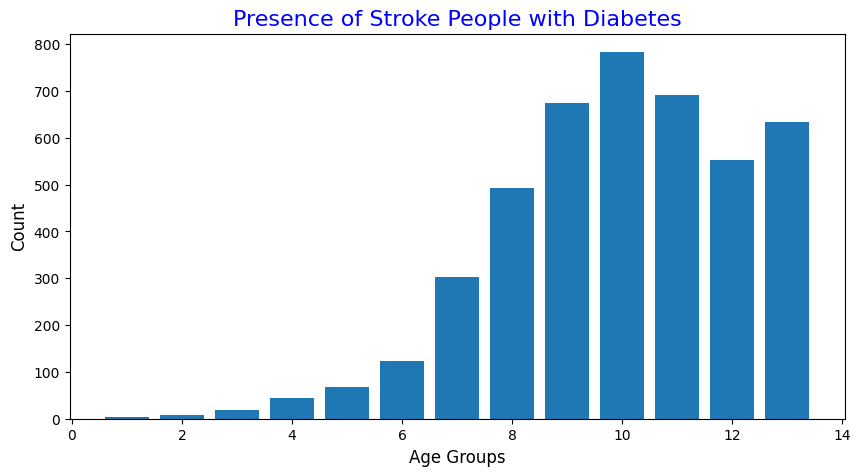

In [35]:
# This table shows stroke occurance across different ages (includes people with diabetes and no diabetes)
diabetes_counts = new_diabetes['Age'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(diabetes_counts.index.astype(int), diabetes_counts.values)
plt.title("Presence of Stroke People with Diabetes", color = 'blue', fontsize = 16)
plt.xlabel("Age Groups", color = 'black', fontsize = 12)
plt.ylabel("Count", color = 'black', fontsize = 12)

Text(0, 0.5, 'Count')

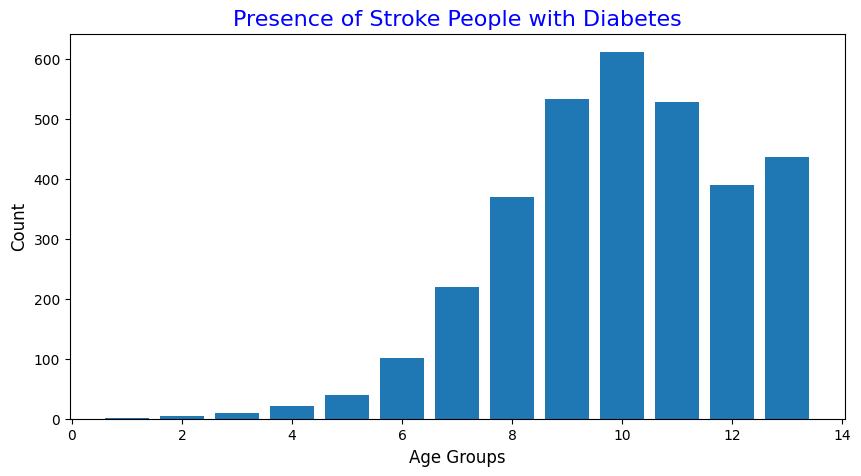

In [37]:
# This table shows stroke occurance across different ages (includes only people with diabetes). It does look alike 
# with the previous table. Agewise stroke affecting same age group regardless of presence of diabetes.
new_diabetes2 = new_diabetes[new_diabetes['Diabetes'] == 1]
diabetes_counts2 = new_diabetes2['Age'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(diabetes_counts2.index.astype(int), diabetes_counts2.values)
plt.title("Presence of Stroke People with Diabetes", color = 'blue', fontsize = 16)
plt.xlabel("Age Groups", color = 'black', fontsize = 12)
plt.ylabel("Count", color = 'black', fontsize = 12)

In [40]:
# Checking to see is stroke occurence in people with diabetes in diabetes dataset
new_diabetes2.Stroke.count()

3268

In [41]:
# Checking overall stroke count in diabetes dataset
diabetes.Stroke.value_counts()

0.0    66297
1.0     4395
Name: Stroke, dtype: int64

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? It was suprising to find that Diabetes dataframe has 50% of people with diabetes and other 50% without diabetes. Also, in the same df, more people with stroke have diabetes compare to with people who have no diabetes.
2. Do you have any concerns about your dataset? No, I have not found any problem yet.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? Yes, I want to make sure to drop the negative age values from stroke table.